In [ ]:
#Import Libaries - Data 
import math
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM

import pandas as pd
import pandas_datareader as reader

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Target company
target_company = 'AAPL'
predictor_companies = ['MSFT', 'AMD', 'INTC']

In [ ]:
#Get previous target stock quotes
tc = reader.DataReader(target_company, data_source='yahoo', start='2020-01-01')
#show data
tc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.573036
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.848030
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.436470
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,74.086395
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.278160
...,...,...,...,...,...,...
2020-10-14,123.029999,119.620003,121.000000,121.190002,151062300.0,121.190002
2020-10-15,121.199997,118.150002,118.720001,120.709999,112559200.0,120.709999
2020-10-16,121.550003,118.809998,121.279999,119.019997,115393800.0,119.019997


In [ ]:
#Get previous stock quotes for predictor companies
pred_quotes = reader.DataReader(predictor_companies, data_source='yahoo', start='2020-01-01')
pred_quotes['Close']

Symbols,MSFT,AMD,INTC
Date,,,
2020-01-02,160.619995,49.099998,60.840000
2020-01-03,158.619995,48.599998,60.099998
2020-01-06,159.029999,48.389999,59.930000
2020-01-07,157.580002,48.250000,58.930000
2020-01-08,160.089996,47.830002,58.970001
...,...,...,...
2020-10-14,220.860001,84.209999,53.549999
2020-10-15,219.660004,83.129997,53.849998
2020-10-16,219.660004,83.169998,54.160000


In [ ]:
tc.shape

(203, 6)

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

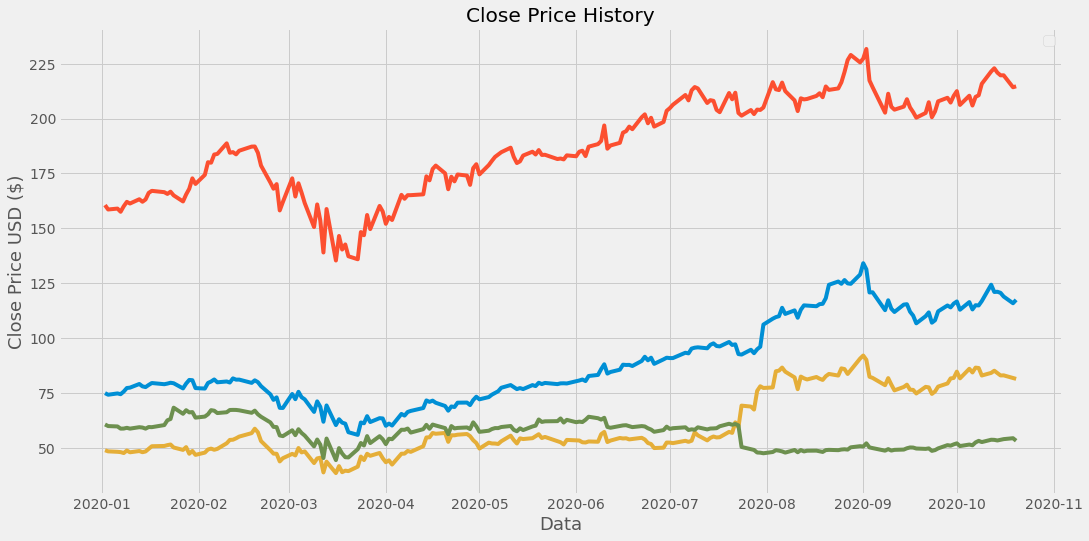

In [ ]:
#Visualize the closing price history for company data
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(tc['Close'])
plt.plot(pred_quotes['Close'])
plt.legend()
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [ ]:
#Create new data frames from only the Close column
data_target = tc.filter(['Close'])
data_pred = pred_quotes['Close']

#Convert the data frames to an array
dataset_target = data_target.values
dataset_pred = data_pred.values

#Convert the number of rows to train the model on
training_target_data_len = math.ceil(len(dataset_target) * .8)
training_pred_data_len = math.ceil(len(dataset_pred) * .8)

if (training_target_data_len != training_pred_data_len):
  raise Exception('Data set build error')

training_data_len = training_pred_data_len
training_data_len

163

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_target_data = scaler.fit_transform(dataset_target)
scaled_pred_data = scaler.fit_transform(dataset_pred)
# print(f'{scaled_pred_data}\n{scaled_target_data}')

In [ ]:
#Create the training data set
#Create the scaled training data set
train_target_data = scaled_target_data[0:training_data_len, :]
train_pred_data = scaled_pred_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range (60, len(train_target_data)):
  x_train.append(train_data)

array([[0.24325282],
       [0.23390428],
       [0.24149191],
       [0.23697783],
       [0.25234517],
       [0.27296307],
       [0.27520409],
       [0.2964303 ],
       [0.28272772],
       [0.27843768],
       [0.29092365],
       [0.30209708],
       [0.29518175],
       [0.2987995 ],
       [0.30369785],
       [0.30075239],
       [0.27078605],
       [0.29876746],
       [0.32005766],
       [0.31855293],
       [0.27257891],
       [0.26985758],
       [0.30248125],
       [0.31080527],
       [0.32284298],
       [0.30625904],
       [0.31112534],
       [0.30491435],
       [0.3292141 ],
       [0.32175447],
       [0.32201064],
       [0.30296146],
       [0.31775255],
       [0.30712342],
       [0.28391228],
       [0.23630544],
       [0.20396989],
       [0.21860094],
       [0.15735552],
       [0.15684327],
       [0.23832242],
       [0.20793987],
       [0.25090444],
       [0.21946542],
       [0.20701139],
       [0.1338243 ],
       [0.19519771],
       [0.163